In [2]:
import h2o

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "10.0.2" 2018-07-17; OpenJDK Runtime Environment (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4); OpenJDK 64-Bit Server VM (build 10.0.2+13-Ubuntu-1ubuntu0.18.04.4, mixed mode)
  Starting server from /home/jay/.conda/envs/tensorflow/lib/python3.6/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpp2i20550
  JVM stdout: /tmp/tmpp2i20550/h2o_jay_started_from_python.out
  JVM stderr: /tmp/tmpp2i20550/h2o_jay_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,04 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.22.1.2
H2O cluster version age:,1 month and 2 days
H2O cluster name:,H2O_from_python_jay_0oj307
H2O cluster total nodes:,1
H2O cluster free memory:,1.439 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [5]:
data = h2o.import_file("http://h2o-public-test-data.s3.amazonaws.com/smalldata/airlines/allyears2k_headers.zip")
train, valid, test = data.split_frame([0.8,0.1],seed = 69)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [6]:
print("%d/%d/%d" % (train.nrows,valid.nrows,test.nrows))

35255/4272/4451


In [7]:
y = "IsArrDelayed"
ignoreFields = [
    "ArrDelay","DepDelay","CarrierDelay",
    "WeatherDelay","NASDelay","SecurityDelay",
    "LateAircraftDelay","IsDepDelayed","IsArrDelayed","ActualElapsedTime","Arrtime"] #But CRSElapsedTime is fine.
xAll = [i for i in train.names if i not in ignoreFields]

In [8]:
from h2o.estimators.deeplearning import H2ODeepLearningEstimator

In [9]:
m_def = H2ODeepLearningEstimator()
%time m_def.train(xAll,y,train,validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 1.59 s, sys: 112 ms, total: 1.7 s
Wall time: 4min 6s


In [10]:
m_def.model_performance(test) 


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.10210221406476798
RMSE: 0.3195343707095811
LogLoss: 0.3162203831075995
Mean Per-Class Error: 0.14943355990936957
AUC: 0.9404190118824265
pr_auc: 0.6827552767710612
Gini: 0.880838023764853
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5363313903400271: 


,NO,YES,Error,Rate
NO,1571.0,379.0,0.1944,(379.0/1950.0)
YES,270.0,2231.0,0.108,(270.0/2501.0)
Total,1841.0,2610.0,0.1458,(649.0/4451.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5363314,0.8730190,191.0
max f2,0.1933958,0.9251052,305.0
max f0point5,0.8839792,0.8941990,67.0
max accuracy,0.5363314,0.8541901,191.0
max precision,0.9999416,1.0,0.0
max recall,0.0070355,1.0,391.0
max specificity,0.9999416,1.0,0.0
max absolute_mcc,0.5363314,0.7028876,191.0
max min_per_class_accuracy,0.6245309,0.8487179,160.0
max mean_per_class_accuracy,0.6634135,0.8505664,145.0


Gains/Lift Table: Avg response rate: 56.19 %, avg score: 60.03 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0172995,1.0,1.7796881,1.7796881,1.0,1.0,1.0,1.0,0.0307877,0.0307877,77.9688125,77.9688125
,2,0.0202202,1.0000000,1.7796881,1.7796881,1.0,1.0000000,1.0,1.0000000,0.0051979,0.0359856,77.9688125,77.9688125
,3,0.0301056,1.0000000,1.7796881,1.7796881,1.0,1.0000000,1.0,1.0000000,0.0175930,0.0535786,77.9688125,77.9688125
,4,0.0402157,1.0000000,1.7796881,1.7796881,1.0,1.0000000,1.0,1.0000000,0.0179928,0.0715714,77.9688125,77.9688125
,5,0.0501011,0.9999996,1.7796881,1.7796881,1.0,0.9999999,1.0,1.0000000,0.0175930,0.0891643,77.9688125,77.9688125
,6,0.1002022,0.9999652,1.7796881,1.7796881,1.0,0.9999899,1.0,0.9999949,0.0891643,0.1783287,77.9688125,77.9688125
,7,0.1500786,0.9996695,1.7796881,1.7796881,1.0,0.9998639,1.0,0.9999514,0.0887645,0.2670932,77.9688125,77.9688125
,8,0.2001797,0.9981935,1.7796881,1.7796881,1.0,0.9991016,1.0,0.9997387,0.0891643,0.3562575,77.9688125,77.9688125
,9,0.3001573,0.9814588,1.7196986,1.7597066,0.9662921,0.9923834,0.9887725,0.9972888,0.1719312,0.5281887,71.9698637,75.9706596
,10,0.4001348,0.9079898,1.5797232,1.7147360,0.8876404,0.9506042,0.9635036,0.9856242,0.1579368,0.6861255,57.9723167,71.4736003


In [11]:
m_def

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1550746103044_1


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.08006657555713022
RMSE: 0.28296037806931595
LogLoss: 0.25365528481498506
Mean Per-Class Error: 0.11129118976313546
AUC: 0.9632792578138362
pr_auc: 0.7356981270786768
Gini: 0.9265585156276723
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5252951942405487: 


,NO,YES,Error,Rate
NO,3870.0,644.0,0.1427,(644.0/4514.0)
YES,470.0,5048.0,0.0852,(470.0/5518.0)
Total,4340.0,5692.0,0.111,(1114.0/10032.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5252952,0.9006244,189.0
max f2,0.2480164,0.9334594,285.0
max f0point5,0.8266205,0.9214412,88.0
max accuracy,0.5361516,0.8890550,185.0
max precision,0.9999763,1.0,0.0
max recall,0.0223187,1.0,383.0
max specificity,0.9999763,1.0,0.0
max absolute_mcc,0.6059729,0.7758031,162.0
max min_per_class_accuracy,0.6059729,0.8881841,162.0
max mean_per_class_accuracy,0.6059729,0.8887088,162.0


Gains/Lift Table: Avg response rate: 55.00 %, avg score: 59.05 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0162480,1.0,1.8180500,1.8180500,1.0,1.0,1.0,1.0,0.0295397,0.0295397,81.8050018,81.8050018
,2,0.0200359,1.0000000,1.8180500,1.8180500,1.0,1.0000000,1.0,1.0000000,0.0068866,0.0364262,81.8050018,81.8050018
,3,0.0300040,1.0000000,1.8180500,1.8180500,1.0,1.0000000,1.0,1.0000000,0.0181225,0.0545487,81.8050018,81.8050018
,4,0.0400718,1.0000000,1.8180500,1.8180500,1.0,1.0000000,1.0,1.0000000,0.0183037,0.0728525,81.8050018,81.8050018
,5,0.0500399,0.9999997,1.8180500,1.8180500,1.0,0.9999998,1.0,1.0000000,0.0181225,0.0909750,81.8050018,81.8050018
,6,0.1000797,0.9999679,1.8180500,1.8180500,1.0,0.9999899,1.0,0.9999950,0.0909750,0.1819500,81.8050018,81.8050018
,7,0.1500199,0.9997097,1.8180500,1.8180500,1.0,0.9998706,1.0,0.9999536,0.0907938,0.2727437,81.8050018,81.8050018
,8,0.2000598,0.9985410,1.8144284,1.8171442,0.9980080,0.9992723,0.9995017,0.9997832,0.0907938,0.3635375,81.4428405,81.7144164
,9,0.3000399,0.9846201,1.8071743,1.8138220,0.9940179,0.9935355,0.9976744,0.9977013,0.1806814,0.5442189,80.7174345,81.3821995
,10,0.4000199,0.9142840,1.6784789,1.7799946,0.9232303,0.9564328,0.9790680,0.9873868,0.1678144,0.7120333,67.8478880,77.9994648




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.09901016588279568
RMSE: 0.3146588086845745
LogLoss: 0.3129353452217209
Mean Per-Class Error: 0.13897127079081684
AUC: 0.9432766599421801
pr_auc: 0.694989405626899
Gini: 0.8865533198843603
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4331607542083898: 


,NO,YES,Error,Rate
NO,1504.0,429.0,0.2219,(429.0/1933.0)
YES,195.0,2144.0,0.0834,(195.0/2339.0)
Total,1699.0,2573.0,0.1461,(624.0/4272.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.4331608,0.8729642,216.0
max f2,0.1848723,0.9183592,310.0
max f0point5,0.8615159,0.8992619,73.0
max accuracy,0.5775496,0.8600187,165.0
max precision,0.9996205,0.9986092,1.0
max recall,0.0065474,1.0,391.0
max specificity,0.9999691,0.9994827,0.0
max absolute_mcc,0.6804493,0.7188120,131.0
max min_per_class_accuracy,0.6000743,0.8577341,157.0
max mean_per_class_accuracy,0.6804493,0.8610287,131.0


Gains/Lift Table: Avg response rate: 54.75 %, avg score: 58.63 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0180243,1.0,1.8264215,1.8264215,1.0,1.0,1.0,1.0,0.0329201,0.0329201,82.6421548,82.6421548
,2,0.0201311,1.0000000,1.8264215,1.8264215,1.0,1.0000000,1.0,1.0,0.0038478,0.0367678,82.6421548,82.6421548
,3,0.0301966,1.0000000,1.8264215,1.8264215,1.0,1.0000000,1.0,1.0000000,0.0183839,0.0551518,82.6421548,82.6421548
,4,0.0400281,1.0000000,1.8264215,1.8264215,1.0,1.0000000,1.0,1.0000000,0.0179564,0.0731082,82.6421548,82.6421548
,5,0.0500936,0.9999998,1.8264215,1.8264215,1.0,0.9999999,1.0,1.0000000,0.0183839,0.0914921,82.6421548,82.6421548
,6,0.1001873,0.9999770,1.8264215,1.8264215,1.0,0.9999937,1.0,0.9999968,0.0914921,0.1829842,82.6421548,82.6421548
,7,0.1500468,0.9997148,1.8178468,1.8235722,0.9953052,0.9998858,0.9984399,0.9999599,0.0906370,0.2736212,81.7846799,82.3572216
,8,0.2001404,0.9985469,1.8093522,1.8200131,0.9906542,0.9992093,0.9964912,0.9997720,0.0906370,0.3642582,80.9352187,82.0013051
,9,0.3000936,0.9825179,1.7708162,1.8036269,0.9695550,0.9930702,0.9875195,0.9975398,0.1769987,0.5412569,77.0816208,80.3626895
,10,0.4000468,0.8962788,1.6168322,1.7569555,0.8852459,0.9497722,0.9619661,0.9856049,0.1616075,0.7028645,61.6832190,75.6955544



Scoring History: 


,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
,2019-02-21 16:19:12,0.000 sec,None,0.0,0,0.0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
,2019-02-21 16:19:16,13.615 sec,748 obs/sec,0.0680187,1,2398.0,0.5928198,0.9855640,-0.4199634,0.6877067,0.7411407,1.8180500,0.4051037,0.5901515,0.9781657,-0.4058125,0.6766764,0.7322415,1.8264215,0.4152622
,2019-02-21 16:20:51,1 min 50.715 sec,1780 obs/sec,4.4994469,66,158628.0,0.3673049,0.4045635,0.4548886,0.9377381,0.8734005,1.8180500,0.1521132,0.3822806,0.4409759,0.4101184,0.9212706,0.8366725,1.8264215,0.1783708
,2019-02-21 16:22:46,3 min 45.357 sec,1744 obs/sec,9.5312154,140,336023.0,0.2903697,0.2645006,0.6593295,0.9620481,0.7504249,1.8180500,0.1125399,0.3242463,0.3299899,0.5756244,0.9391867,0.7307875,1.8264215,0.1455993
,2019-02-21 16:23:08,4 min 4.616 sec,1734 obs/sec,10.0073748,147,352810.0,0.2829604,0.2536553,0.6764935,0.9632793,0.7356981,1.8180500,0.1110447,0.3146588,0.3129353,0.6003496,0.9432767,0.6949894,1.8264215,0.1460674


Variable Importances: 


variable,relative_importance,scaled_importance,percentage
ArrTime,1.0,1.0,0.0024123
CRSArrTime,0.8323990,0.8323990,0.0020080
CRSDepTime,0.6589147,0.6589147,0.0015895
DepTime,0.6320719,0.6320719,0.0015248
TailNum.NA,0.4901025,0.4901025,0.0011823
---,---,---,---
TailNum.N395US,0.0881253,0.0881253,0.0002126
TailNum.N410AA,0.0869057,0.0869057,0.0002096
Dest.missing(NA),0.0,0.0,0.0
Origin.missing(NA),0.0,0.0,0.0



See the whole table with table.as_data_frame()


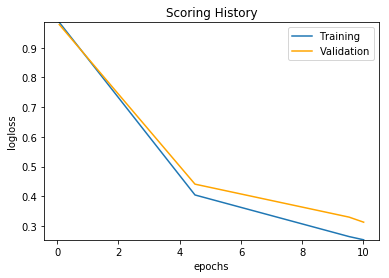

In [12]:
m_def.plot()

# Tuning Idea : will more effort help ?

In [14]:
m_200_epochs = H2ODeepLearningEstimator(epochs = 200, stopping_rounds = 5,
                                        stopping_tolerance = 0,
                                        stopping_metric = "logloss "
                                       )
%time m_200_epochs.train(xAll,y,train,validation_frame = valid)

deeplearning Model Build progress: |██████████████████████████████████████| 100%
CPU times: user 4.42 s, sys: 238 ms, total: 4.66 s
Wall time: 18min 47s


In [15]:
m_200_epochs.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.08235958393199476
RMSE: 0.28698359523149536
LogLoss: 0.27618991601826776
Mean Per-Class Error: 0.11025846071827683
AUC: 0.9584693302166313
pr_auc: 0.5821980378754433
Gini: 0.9169386604332626
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.515983356223057: 


,NO,YES,Error,Rate
NO,1714.0,236.0,0.121,(236.0/1950.0)
YES,263.0,2238.0,0.1052,(263.0/2501.0)
Total,1977.0,2474.0,0.1121,(499.0/4451.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.5159834,0.8996985,197.0
max f2,0.2143289,0.9299348,294.0
max f0point5,0.8109846,0.9172911,95.0
max accuracy,0.5722539,0.8887890,178.0
max precision,0.9999770,0.9969104,0.0
max recall,0.0000487,1.0,399.0
max specificity,0.9999770,0.9984615,0.0
max absolute_mcc,0.5722539,0.7760441,178.0
max min_per_class_accuracy,0.5553050,0.8864454,185.0
max mean_per_class_accuracy,0.5722539,0.8897415,178.0


Gains/Lift Table: Avg response rate: 56.19 %, avg score: 56.10 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0334756,1.0,1.7796881,1.7796881,1.0,1.0,1.0,1.0,0.0595762,0.0595762,77.9688125,77.9688125
,2,0.0402157,1.0000000,1.7796881,1.7796881,1.0,1.0000000,1.0,1.0000000,0.0119952,0.0715714,77.9688125,77.9688125
,3,0.0501011,1.0000000,1.7796881,1.7796881,1.0,1.0000000,1.0,1.0000000,0.0175930,0.0891643,77.9688125,77.9688125
,4,0.1002022,0.9999997,1.7796881,1.7796881,1.0,0.9999999,1.0,1.0000000,0.0891643,0.1783287,77.9688125,77.9688125
,5,0.1500786,0.9999902,1.7796881,1.7796881,1.0,0.9999968,1.0,0.9999989,0.0887645,0.2670932,77.9688125,77.9688125
,6,0.2001797,0.9999039,1.7717075,1.7776907,0.9955157,0.9999593,0.9988777,0.9999890,0.0887645,0.3558577,77.1707461,77.7690719
,7,0.3001573,0.9970165,1.7516930,1.7690313,0.9842697,0.9992173,0.9940120,0.9997319,0.1751299,0.5309876,75.1693031,76.9031310
,8,0.4001348,0.9439982,1.6637084,1.7427154,0.9348315,0.9795381,0.9792252,0.9946863,0.1663335,0.6973211,66.3708449,74.2715379
,9,0.5001123,0.7098366,1.3757589,1.6693571,0.7730337,0.8423603,0.9380054,0.9642348,0.1375450,0.8348661,37.5758910,66.9357055
,10,0.6000899,0.3516316,0.9158395,1.5438178,0.5146067,0.5363755,0.8674654,0.8929516,0.0915634,0.9264294,-8.4160493,54.3817815


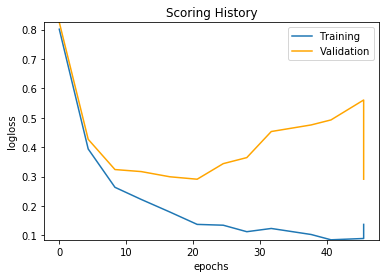

In [16]:
m_200_epochs.plot()

# Tuning idea : does it need another layer?

In [ ]:
m_200x200x200 = H2ODeepLearningEstimator(epochs = 200,
                                         #same early stopping
                                         hidden = [200,200,200]
                                        )
%time m_200x200x200.train(xAll, y, train , validation_frame =valid)

In [ ]:
m_200x200x200.performance(test)

In [ ]:
m_200x200x200.plot()

In [ ]:
m_400x400 = H2ODeepLearningEstimator(epochs = 200,
                                         #same early stopping
                                         hidden = [400,400]
                                        )
%time m_400x400.train(xAll, y, train , validation_frame =valid)

In [ ]:
m_400x400.model_performance(test)

In [ ]:
m_400x400.plot()

## why did it took longer ?

In [18]:
m_def.summary()

Status of Neuron Layers: predicting IsArrDelayed, 2-class classification, bernoulli distribution, CrossEntropy loss, 801,202 weights/biases, 9.2 MB, 353,329 training samples, mini-batch size 1



,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
,1,3802,Input,0.0,,,,,,,,,
,2,200,Rectifier,0.0,0.0,0.0,0.5555270,0.4765713,0.0,0.0001032,0.0262960,-0.3714153,0.3084251
,3,200,Rectifier,0.0,0.0,0.0,0.2534810,0.3279661,0.0,-0.0047374,0.0870414,-0.0675062,0.2827778
,4,2,Softmax,,0.0,0.0,0.0253593,0.0730962,0.0,-0.0031797,0.3025504,-0.0063218,0.2627300


In [20]:
m_def.summary()['units']

[3802, 200, 200, 2]

In [21]:
(3802*200)+(200*200)+(200*2)

800800

In [22]:
m_200x200x200.summary()

NameError: name 'm_200x200x200' is not defined

In [ ]:
m_200x200x200.summary()['units']

In [ ]:
m_400x400.summary()

In [ ]:
m_400x400.summary()['units']

In [ ]:
train.nlevels() #enum cardinality

In [ ]:
train.structure()

## Model without that high-cardinality column

In [1]:
x2 = list(filter(lambda v: v != 'TailNum',xAll))

NameError: name 'xAll' is not defined

In [ ]:
m2_def = H2ODeepLearningEstimator()
%time m2_def.train(x2,y,train,validation_frame = valid)

In [ ]:
m2_200_epochs = H2ODeepLearningEstimator(epochs = 200, stopping_rounds = 5,
                                        stopping_tolerance = 0,
                                        stopping_metric = "logloss "
                                        )
%time m2_200_epochs.train(xAll,y,train,validation_frame = valid)

In [ ]:
m2_200x200x200 = H2ODeepLearningEstimator(epochs = 200,
                                         #same early stopping
                                         hidden = [200,200,200]
                                         )
%time m2_200x200x200.train(xAll, y, train , validation_frame =valid)

In [ ]:
m2_400x400 = H2ODeepLearningEstimator(epochs = 200,
                                      #same early stopping
                                      hidden = [400,400]
                                     )
%time m2_400x400.train(xAll, y, train , validation_frame =valid)